<a href="https://colab.research.google.com/github/vartikatrao/SpamClassifier/blob/main/SpamClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [9]:
import pandas as pd
messages= pd.read_csv('spam.csv', usecols=[0,1], encoding = "ISO-8859-1", skiprows=1,  names=['label', 'message'])

In [10]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [38]:
from nltk.corpus import stopwords
from nltk.corpus.reader import wordnet
#cleaning of text
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
wordnet= WordNetLemmatizer()
ps= PorterStemmer()
corpus=[]
for i in range (len(messages)):
  review= re.sub('[^a-zA-Z]', ' ',messages['message'][i])
  review= review.lower()
  review= review.split()
  review= [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
  review=' '.join(review)
  corpus.append(review)

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features=2500)
X= cv.fit_transform(corpus).toarray()
X.shape

(5572, 2500)

In [52]:
y=pd.get_dummies(messages['label'])
y=y.iloc[:, 1].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2 ,random_state=42)

In [54]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)
y_pred= spam_detect_model.predict(X_test)

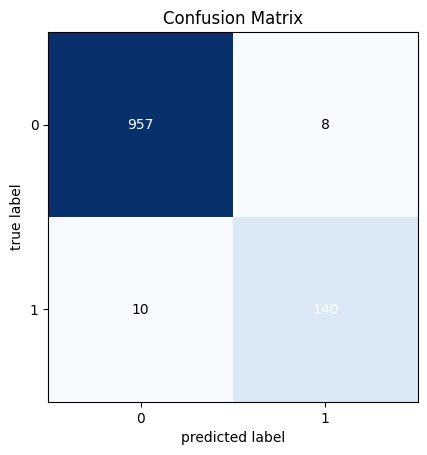

In [55]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
cm= confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.title('Confusion Matrix')
plt.show()

In [56]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy*=100
print(f"The accuracy of the model is {accuracy:.2f}%")

The accuracy of the model is 98.39%
